### Exploring a model or two based on our cleaned (sql) data ###

importing relevant libraries and reading in our data, also defining assumption check functions (since QQplot is too strict, plotting residuals with kdeplot to check for normality)

In [83]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_style('darkgrid')

df = pd.read_csv('../asp_original', index_col=0)

def check_for_assumptions(modelname):
    rsquared = modelname.rsquared
    params = modelname.params
    print(f'Rsquared of Model: {rsquared}')
    print('----------')
    print('Beta values of Model:')
    print(params)
    rainbow_statistic, rainbow_p_value = linear_rainbow(modelname)
    print("Rainbow statistic:", rainbow_statistic)
    print("Rainbow p-value:", rainbow_p_value)
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    residuals = modelname.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax[0])
    ax[0].set_title('QQ-Plot of Residuals')
    ax[1].scatter(modelname.predict(), modelname.resid)
    sns.set(font_scale = 1)
    ax[1].set_title('Homoscadasicity Assumption')
    plt.xlabel('Model Predictions')
    plt.ylabel('Model Residuals')
    ax[1].plot(modelname.predict(), [0 for i in range(len(df))], color = 'red')
    fig.tight_layout()
    return plt.show()
def check_for_assumptions_with_kde(modelname):
    rsquared = modelname.rsquared
    params = modelname.params
    print(f'Rsquared of Model: {rsquared}')
    print('----------')
    print('Beta values of Model:')
    print(params)
    rainbow_statistic, rainbow_p_value = linear_rainbow(modelname)
    print("Rainbow statistic:", rainbow_statistic)
    print("Rainbow p-value:", rainbow_p_value)
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    residuals = modelname.resid
    sns.kdeplot(residuals, shade=True, ax=ax[0])
    ax[0].set_title('Normality Assumption of Residuals')
    ax[1].scatter(modelname.predict(), modelname.resid)
    sns.set(font_scale = 1)
    ax[1].set_title('Homoscadasicity Assumption')
    plt.xlabel('Model Predictions')
    plt.ylabel('Model Residuals')
    ax[1].plot(modelname.predict(), [0 for i in range(len(df))], color = 'red')
    fig.tight_layout()
    return plt.show()

In [2]:
df.columns

Index(['documentdate', 'saleprice', 'propertytype', 'principaluse',
       'saleinstrument', 'currentuseland', 'historicproperty', 'salereason',
       'propertyclass', 'zipcode', 'streettype', 'stories', 'buildinggrade',
       'squarefeettotalliving', 'squarefeettotalbasement',
       'squarefeetgarageattached', 'squarefeetopenporch',
       'squarefeetenclosedporch', 'squarefeetdeck', 'bedrooms',
       'bathhalfcount', 'bath3qtrcount', 'bathfullcount',
       'fireplacesinglestory', 'fireplacemultiplestory',
       'fireplacefreestanding', 'fireplaceadditional', 'yearbuilt',
       'yearrenovated', 'percentcomplete', 'obsolescence',
       'percentnetcondition', 'condition', 'township', 'propertytype.1',
       'districtname', 'levycode', 'lotsquarefootage', 'watersystem', 'access',
       'topography', 'viewmtranier', 'viewolympics', 'viewcascades',
       'viewterritorial', 'viewseattleskyline', 'viewpugetsound',
       'viewlakewashington', 'viewlakesammamish', 'viewsmalllakeriv

**Subsetting this dataframe to include variables that can be the best predictors of our target (based on prior models). Again, I am only looking at continuous or discrete variables and not including categorical variables for now...**

In [4]:
df1 = df[['saleprice', 'squarefeettotalliving', 'squarefeettotalbasement',
        'squarefeetgarageattached', 'squarefeetopenporch',
        'squarefeetenclosedporch', 'squarefeetdeck', 'bedrooms',
        'bathhalfcount', 'bath3qtrcount', 'bathfullcount', 'yearbuilt',
        'yearrenovated', 'lotsquarefootage','waterfrontlocation']].copy()

In [5]:
df1['baths'] = df1['bathfullcount'] + (0.75*df1['bath3qtrcount']) + (0.5*df1['bathhalfcount'])
df1['sqftporch'] = df1['squarefeetopenporch'] + df1['squarefeetenclosedporch']
df1['living_lot_ratio'] = df1['squarefeettotalliving'] / df1['lotsquarefootage']
df1.drop(columns=['bathhalfcount', 'bath3qtrcount', 'bathfullcount'], inplace=True)

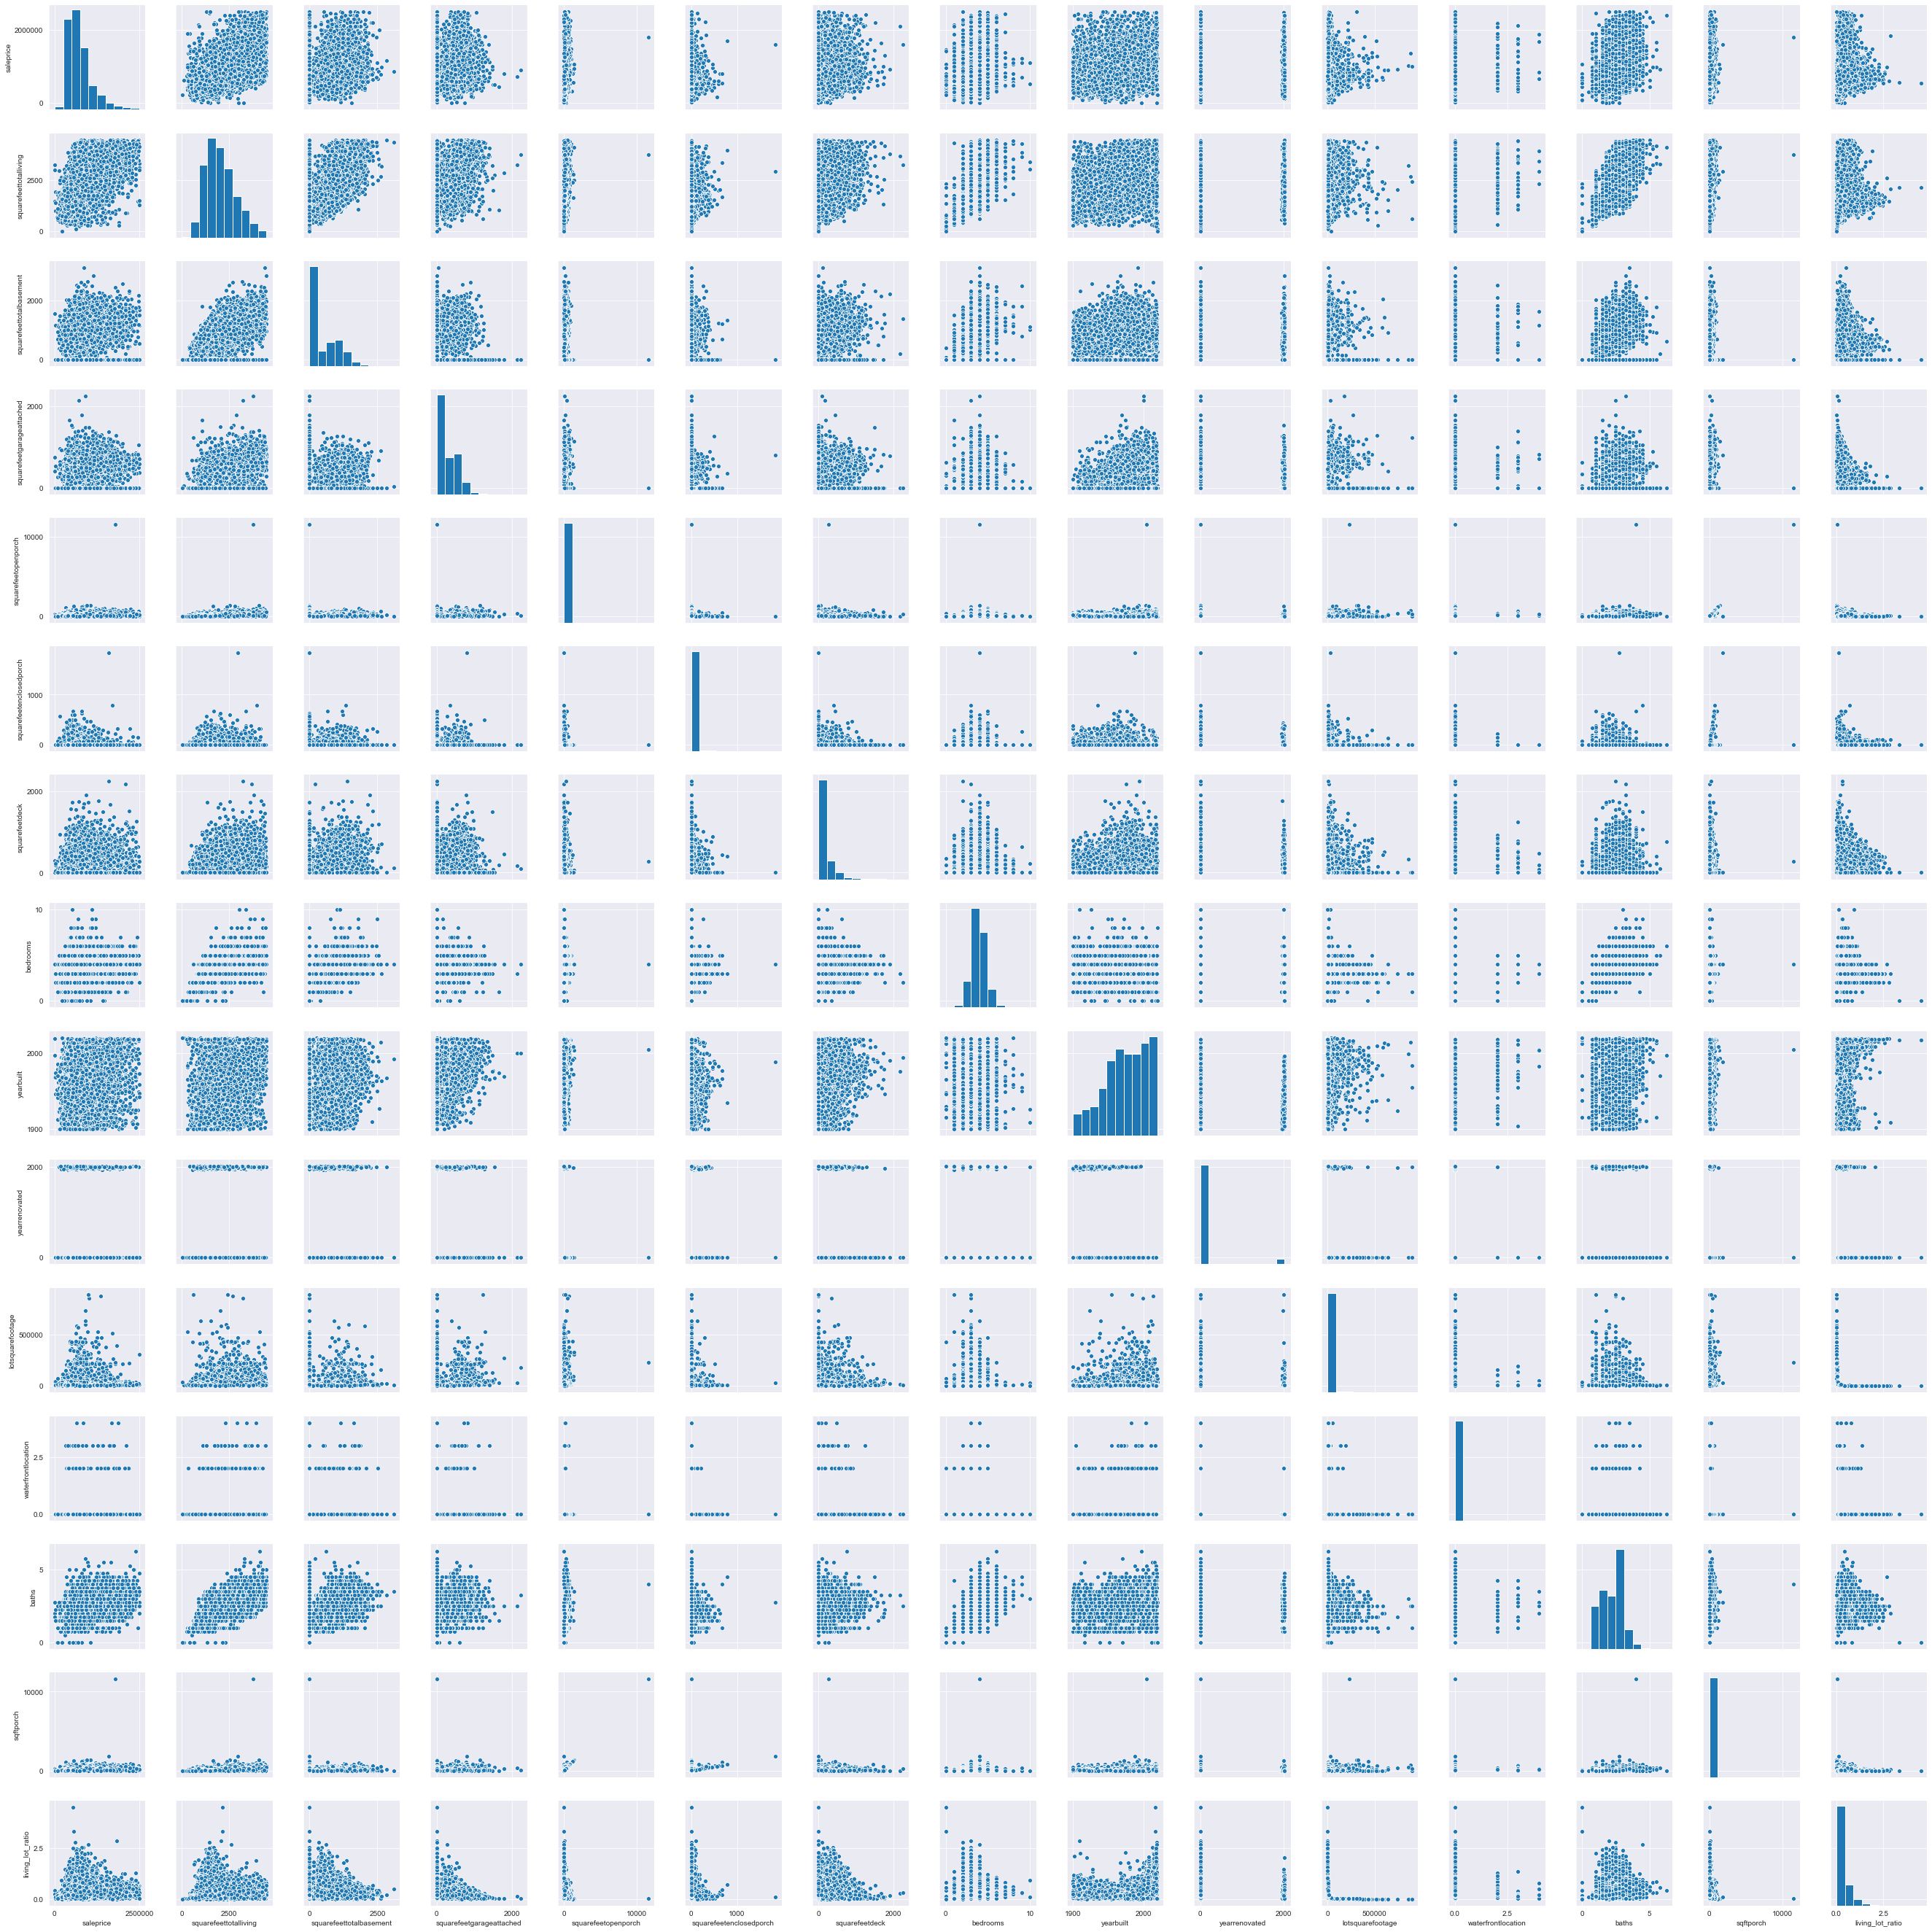

In [6]:
sns.pairplot(df1)
sns.set(font_scale = 2.5)
plt.tight_layout();

In [7]:
df1.corr()

,saleprice,squarefeettotalliving,squarefeettotalbasement,squarefeetgarageattached,squarefeetopenporch,squarefeetenclosedporch,squarefeetdeck,bedrooms,yearbuilt,yearrenovated,lotsquarefootage,waterfrontlocation,baths,sqftporch,living_lot_ratio
saleprice,1.000000,0.596841,0.225156,0.117777,0.206762,0.006293,0.202800,0.285509,0.074909,0.101951,0.059701,0.057722,0.462561,0.202778,0.170719
squarefeettotalliving,0.596841,1.000000,0.239665,0.426611,0.290573,-0.025661,0.204983,0.634902,0.347701,0.029330,0.122644,0.047343,0.744508,0.276352,0.071063
squarefeettotalbasement,0.225156,0.239665,1.000000,-0.397033,-0.061423,0.011927,0.253516,0.191504,-0.257806,0.060091,-0.017141,0.023375,0.143765,-0.056792,0.056125
squarefeetgarageattached,0.117777,0.426611,-0.397033,1.000000,0.161780,-0.053625,-0.009470,0.267568,0.424121,-0.100008,0.120103,0.023725,0.345036,0.144034,-0.200599
squarefeetopenporch,0.206762,0.290573,-0.061423,0.161780,1.000000,-0.019317,-0.034366,0.146284,0.132524,0.014025,0.150508,0.016933,0.217824,0.968298,-0.026499
squarefeetenclosedporch,0.006293,-0.025661,0.011927,-0.053625,-0.019317,1.000000,0.017801,-0.026942,-0.086470,0.017189,0.031480,0.000484,-0.042790,0.231045,-0.008202
squarefeetdeck,0.202800,0.204983,0.253516,-0.009470,-0.034366,0.017801,1.000000,0.080825,0.040924,0.051125,0.112396,0.032560,0.155304,-0.028995,-0.005361
bedrooms,0.285509,0.634902,0.191504,0.267568,0.146284,-0.026942,0.080825,1.000000,0.187954,0.007847,-0.000031,0.015745,0.559888,0.135621,0.001729
yearbuilt,0.074909,0.347701,-0.257806,0.424121,0.132524,-0.086470,0.040924,0.187954,1.000000,-0.250740,0.024371,0.015444,0.516943,0.107358,0.359034
yearrenovated,0.101951,0.029330,0.060091,-0.100008,0.014025,0.017189,0.051125,0.007847,-0.250740,1.000000,0.019620,-0.000303,0.029373,0.017943,-0.028698


### looking for variables with highest correlation with our target ###

In [10]:
df1.corr().saleprice.sort_values(ascending=False)

saleprice                   1.000000
squarefeettotalliving       0.596841
baths                       0.462561
bedrooms                    0.285509
squarefeettotalbasement     0.225156
squarefeetopenporch         0.206762
squarefeetdeck              0.202800
sqftporch                   0.202778
living_lot_ratio            0.170719
squarefeetgarageattached    0.117777
yearrenovated               0.101951
yearbuilt                   0.074909
lotsquarefootage            0.059701
waterfrontlocation          0.057722
squarefeetenclosedporch     0.006293
Name: saleprice, dtype: float64

### Model 1 ###
**'saleprice ~ squarefeettotalliving + baths + bedrooms'**

In [55]:
model1_df = df1[['saleprice', 'squarefeettotalliving', 'baths', 'bedrooms']].copy()
# Fit the model on the dataframe composed of the two features
formula = 'saleprice ~ squarefeettotalliving + baths + bedrooms'
model1 = ols(formula=formula, data=model1_df).fit()
#model1.summary()

Rsquared of Model: 0.37318667126597227
----------
Beta values of Model:
Intercept                277449.287084
squarefeettotalliving       295.959165
baths                     37008.963108
bedrooms                 -68059.541289
dtype: float64
Rainbow statistic: 1.0945831886824546
Rainbow p-value: 8.271382127311921e-06


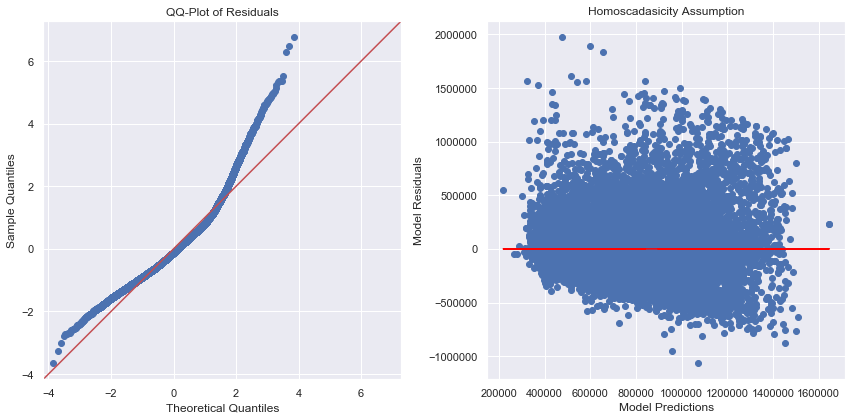

In [56]:
check_for_assumptions(model1)

meeting the normality and homoscadasticity assumptions here

In [57]:
rows = model1_df.iloc[:, 1:].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(3)]
vif_df["feature"] = ['squarefeettotalliving', 'baths', 'bedrooms']

vif_df

,VIF,feature
0,19.485915,squarefeettotalliving
1,20.578389,baths
2,15.759749,bedrooms


**independence assumption**
A generous measure of multicollinearity is the variance inflation factor. It is available from the outlier influence submodule of StatsModels.

**A "rule of thumb" for VIF is that 5 is too high.**

the three chosen vairables are collinear and makes sense as more living area will naturally translate to more space for beds and baths.... can standardizing these variables reduce multicollinearity, I'm curious enough to give it a try


Here's how we go about it: standardize(we'll opt for centering) the variables using their means since its easier to interpret.

## Model 2 ##
**'saleprice ~ sqft_ctr + baths_ctr + bedrooms_ctr'**

In [58]:
model1_df['sqft_ctr'] = (model1_df['squarefeettotalliving'] - model1_df.squarefeettotalliving.mean())
model1_df['baths_ctr'] = (model1_df['baths'] - model1_df.baths.mean())
model1_df['bedrooms_ctr'] = (model1_df['bedrooms'] - model1_df.bedrooms.mean())

In [62]:
model1_df.describe()

,saleprice,squarefeettotalliving,baths,bedrooms,sqft_ctr,baths_ctr,bedrooms_ctr
count,1.818200e+04,18182.000000,18182.000000,18182.000000,1.818200e+04,1.818200e+04,1.818200e+04
mean,7.334650e+05,2051.980420,2.156088,3.395281,-9.644185e-14,9.457229e-17,8.128528e-17
std,3.686947e+05,807.581704,0.732984,0.906136,8.075817e+02,7.329839e-01,9.061365e-01
min,5.000000e+03,2.000000,0.000000,0.000000,-2.049980e+03,-2.156088e+00,-3.395281e+00
25%,4.690000e+05,1440.000000,1.750000,3.000000,-6.119804e+02,-4.060884e-01,-3.952810e-01
50%,6.500000e+05,1930.000000,2.250000,3.000000,-1.219804e+02,9.391156e-02,-3.952810e-01
75%,8.800000e+05,2550.000000,2.500000,4.000000,4.980196e+02,3.439116e-01,6.047190e-01
max,2.498000e+06,4490.000000,6.250000,10.000000,2.438020e+03,4.093912e+00,6.604719e+00


In [63]:
model2_df = model1_df[['saleprice', 'sqft_ctr', 'baths_ctr', 'bedrooms_ctr']].copy()

formula = 'saleprice ~ sqft_ctr + baths_ctr + bedrooms_ctr'
model2 = ols(formula=formula, data=model2_df).fit()
#model2.summary()

Rsquared of Model: 0.37318667126597216
----------
Beta values of Model:
Intercept       733465.026400
sqft_ctr           295.959165
baths_ctr        37008.963108
bedrooms_ctr    -68059.541289
dtype: float64
Rainbow statistic: 1.0945831886824542
Rainbow p-value: 8.271382127315653e-06


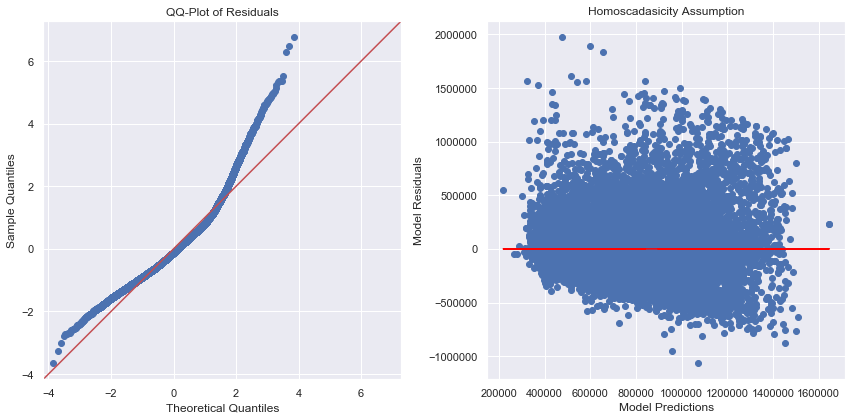

In [64]:
check_for_assumptions(model2)

Rsquared of Model: 0.37318667126597216
----------
Beta values of Model:
Intercept       733465.026400
sqft_ctr           295.959165
baths_ctr        37008.963108
bedrooms_ctr    -68059.541289
dtype: float64
Rainbow statistic: 1.0945831886824542
Rainbow p-value: 8.271382127315653e-06


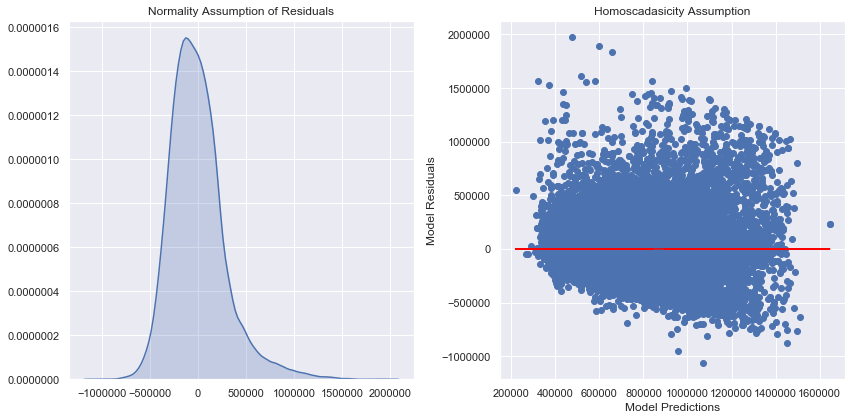

In [84]:
check_for_assumptions_with_kde(model2)

In [65]:
rows = model2_df.iloc[:, 1:].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(3)]
vif_df["feature"] = ['squarefeettotalliving', 'baths', 'bedrooms']

vif_df

,VIF,feature
0,2.656434,squarefeettotalliving
1,2.309635,baths
2,1.724615,bedrooms


**so what did we find? the multicollinearity reduced so much so that we didn't even get the warning message relating to it after our summary table.**

Thats great! r score remained the same, that's good (definitely not bad)
I don't like the idea of having a **negative Beta value for a bedroom**, that does not fit well, I'm going to ***drop*** that predictor and look for another that will increase my R squared and satisfy my assumptions.

## Model 3 ##
**'saleprice ~ squarefeettotalliving + baths + squarefeettotalbasement'**

In [85]:
model1_df['squarefeettotalbasement'] = df1['squarefeettotalbasement']
model1_df['tot_basement_ctr'] = model1_df['squarefeettotalbasement'] - model1_df['squarefeettotalbasement'].mean()

In [86]:
model1_df

,saleprice,squarefeettotalliving,baths,bedrooms,sqft_ctr,baths_ctr,bedrooms_ctr,squarefeettotalbasement,tot_basement_ctr
0,1065000.0,2670,2.75,4,618.01958,0.593912,0.604719,1080,620.193323
1,890000.0,3130,4.50,6,1078.01958,2.343912,2.604719,1590,1130.193323
2,640000.0,1470,1.75,5,-581.98042,-0.406088,1.604719,1210,750.193323
3,645000.0,2020,1.75,4,-31.98042,-0.406088,0.604719,0,-459.806677
4,907000.0,2230,2.50,5,178.01958,0.343912,1.604719,1320,860.193323
...,...,...,...,...,...,...,...,...,...
18177,1042800.0,3550,3.50,4,1498.01958,1.343912,0.604719,1480,1020.193323
18178,368000.0,1720,2.50,2,-331.98042,0.343912,-1.395281,0,-459.806677
18179,393000.0,1210,2.00,3,-841.98042,-0.156088,-0.395281,0,-459.806677
18180,867000.0,1760,1.75,3,-291.98042,-0.406088,-0.395281,1180,720.193323


In [101]:
model3_df = df1[['saleprice', 'squarefeettotalliving', 'baths', 'squarefeettotalbasement']].copy()
# Fit the model on the dataframe composed of the two features
formula = 'saleprice ~ squarefeettotalliving + baths + squarefeettotalbasement'
model3 = ols(formula=formula, data=model3_df).fit()
#model3.summary()

Rsquared of Model: 0.36438716144054506
----------
Beta values of Model:
Intercept                  148448.659055
squarefeettotalliving         246.523532
baths                       24025.581892
squarefeettotalbasement        59.489407
dtype: float64
Rainbow statistic: 1.0946894850338476
Rainbow p-value: 8.100162589752331e-06


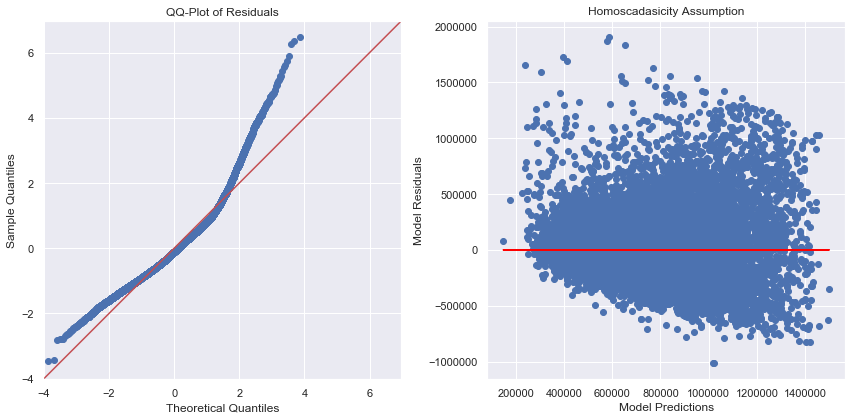

In [88]:
check_for_assumptions(model3)

Rsquared of Model: 0.36438716144054506
----------
Beta values of Model:
Intercept                  148448.659055
squarefeettotalliving         246.523532
baths                       24025.581892
squarefeettotalbasement        59.489407
dtype: float64
Rainbow statistic: 1.0946894850338476
Rainbow p-value: 8.100162589752331e-06


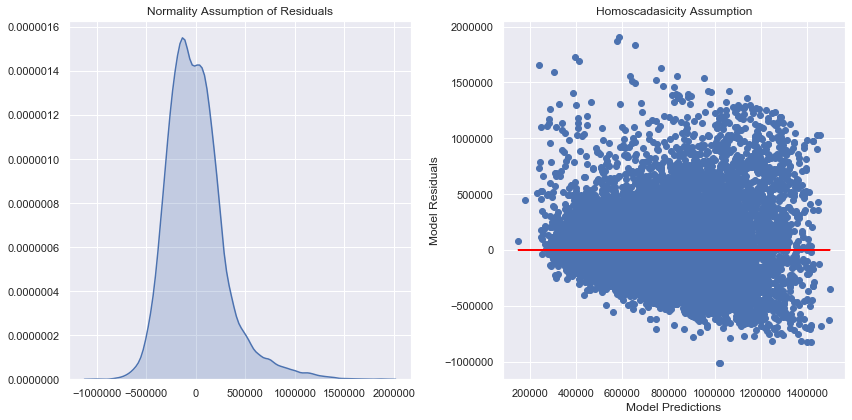

In [89]:
check_for_assumptions_with_kde(model3)

In [90]:
rows = model3_df.iloc[:, 1:].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(3)]
vif_df["feature"] = ['squarefeettotalliving', 'baths', 'squarefeettotalbasement']

vif_df

,VIF,feature
0,17.078206,squarefeettotalliving
1,16.264335,baths
2,1.787348,squarefeettotalbasement


VIF of 5 is high, these are very high
that can be reduced with centering, we've learnt that!

## Model 4 ##
**'saleprice ~ squarefeettotalliving + baths + squarefeettotalbasement + squarefeetdeck'**

In [100]:
model4_df = df1[['saleprice', 'squarefeettotalliving', 'baths', 'squarefeettotalbasement', 'squarefeetdeck']].copy()
# Fit the model on the dataframe composed of the two features
formula = 'saleprice ~ squarefeettotalliving + baths + squarefeettotalbasement + squarefeetdeck'
model4 = ols(formula=formula, data=model4_df).fit()
#model4.summary()

Rsquared of Model: 0.3686177714880384
----------
Beta values of Model:
Intercept                  147236.065813
squarefeettotalliving         242.307113
baths                       23239.122988
squarefeettotalbasement        49.572834
squarefeetdeck                123.584794
dtype: float64
Rainbow statistic: 1.0941224138603454
Rainbow p-value: 9.059464852070395e-06


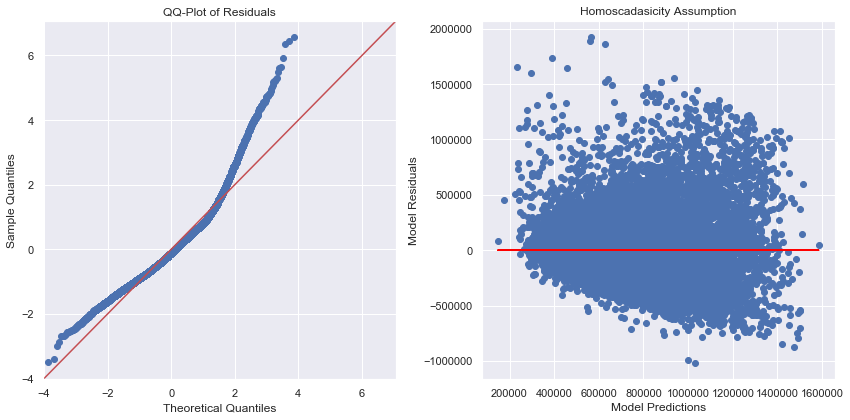

In [92]:
check_for_assumptions(model4)

Rsquared of Model: 0.3686177714880384
----------
Beta values of Model:
Intercept                  147236.065813
squarefeettotalliving         242.307113
baths                       23239.122988
squarefeettotalbasement        49.572834
squarefeetdeck                123.584794
dtype: float64
Rainbow statistic: 1.0941224138603454
Rainbow p-value: 9.059464852070395e-06


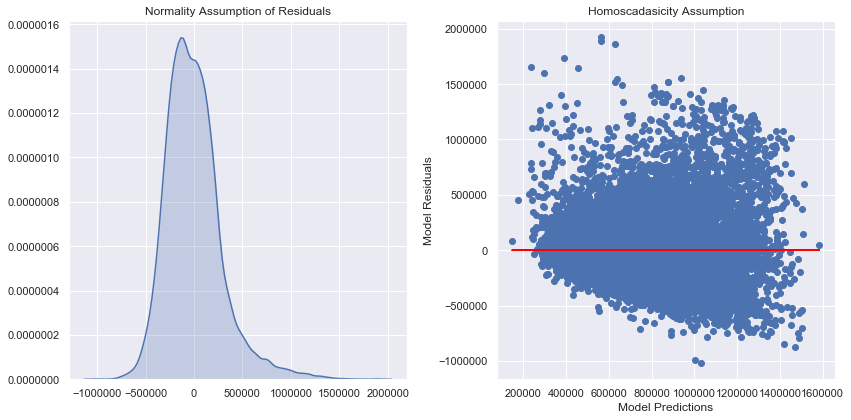

In [93]:
check_for_assumptions_with_kde(model4)

In [98]:
rows = model4_df.iloc[:, 1:].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(4)]
vif_df["feature"] = ['squarefeettotalliving', 'baths', 'squarefeettotalbasement', 'squarefeetdeck']

vif_df

,VIF,feature
0,17.235956,squarefeettotalliving
1,16.276871,baths
2,1.876639,squarefeettotalbasement
3,1.546257,squarefeetdeck


## Model 5 ##
**'saleprice ~ squarefeettotalliving + baths + squarefeettotalbasement + squarefeetdeck + sqftporch'**

In [99]:
model5_df = df1[['saleprice', 'squarefeettotalliving', 'baths', 'squarefeettotalbasement', 'squarefeetdeck', 'sqftporch']].copy()
# Fit the model on the dataframe composed of the two features
formula = 'saleprice ~ squarefeettotalliving + baths + squarefeettotalbasement + squarefeetdeck + sqftporch'
model5 = ols(formula=formula, data=model5_df).fit()
#model5.summary()

Rsquared of Model: 0.37172471703159404
----------
Beta values of Model:
Intercept                  150204.659602
squarefeettotalliving         233.429873
baths                       23792.315803
squarefeettotalbasement        54.175309
squarefeetdeck                130.434576
sqftporch                     154.006455
dtype: float64
Rainbow statistic: 1.0929712357435082
Rainbow p-value: 1.1345446278446329e-05


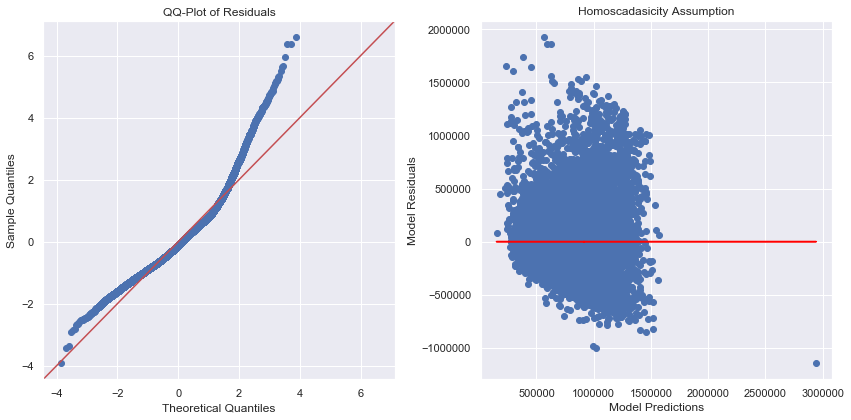

In [95]:
check_for_assumptions(model5)

Rsquared of Model: 0.37172471703159404
----------
Beta values of Model:
Intercept                  150204.659602
squarefeettotalliving         233.429873
baths                       23792.315803
squarefeettotalbasement        54.175309
squarefeetdeck                130.434576
sqftporch                     154.006455
dtype: float64
Rainbow statistic: 1.0929712357435082
Rainbow p-value: 1.1345446278446329e-05


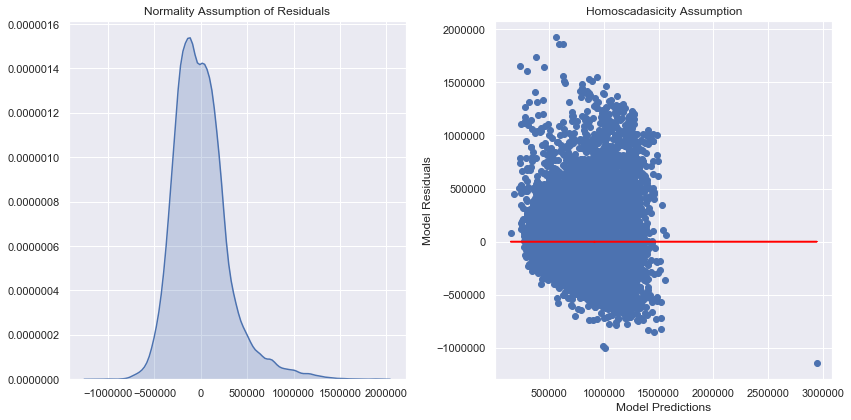

In [96]:
check_for_assumptions_with_kde(model5)

In [97]:
rows = model5_df.iloc[:, 1:].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(5)]
vif_df["feature"] = ['squarefeettotalliving', 'baths', 'squarefeettotalbasement', 'squarefeetdeck', 'sqftporch']

vif_df

,VIF,feature
0,18.091148,squarefeettotalliving
1,16.304955,baths
2,1.904341,squarefeettotalbasement
3,1.552860,squarefeetdeck
4,1.392629,sqftporch


failing the independence assumption

## Model 6 ##
**'saleprice ~ squarefeettotalliving + baths + squarefeettotalbasement + squarefeetdeck + sqftporch + living_lot_ratio'**

In [103]:
model6_df = df1[['saleprice', 'squarefeettotalliving', 'baths', 'squarefeettotalbasement',
                 'squarefeetdeck', 'sqftporch', 'living_lot_ratio']].copy()

formula = 'saleprice ~ squarefeettotalliving + baths + squarefeettotalbasement + squarefeetdeck + sqftporch + living_lot_ratio'
model6 = ols(formula=formula, data=model6_df).fit()
#model5.summary()

Rsquared of Model: 0.38774065168007577
----------
Beta values of Model:
Intercept                  129572.321313
squarefeettotalliving         250.076537
baths                       -7784.196321
squarefeettotalbasement        48.670842
squarefeetdeck                139.970378
sqftporch                     169.693010
living_lot_ratio           156571.657690
dtype: float64
Rainbow statistic: 1.0885407265825688
Rainbow p-value: 2.6386597546422514e-05


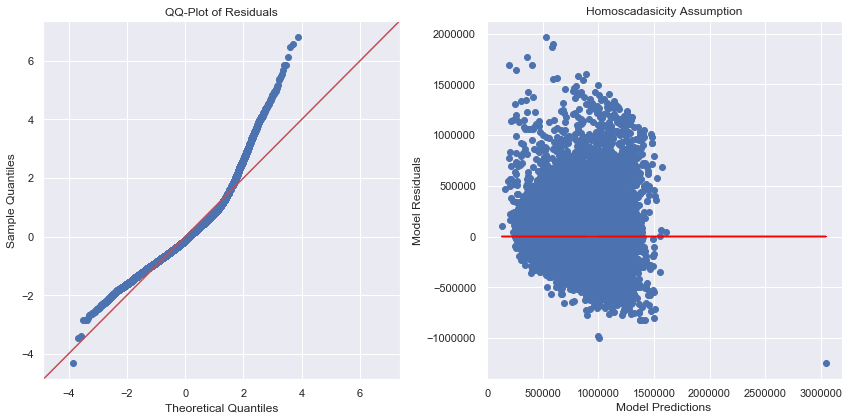

In [104]:
check_for_assumptions(model6)

Rsquared of Model: 0.38774065168007577
----------
Beta values of Model:
Intercept                  129572.321313
squarefeettotalliving         250.076537
baths                       -7784.196321
squarefeettotalbasement        48.670842
squarefeetdeck                139.970378
sqftporch                     169.693010
living_lot_ratio           156571.657690
dtype: float64
Rainbow statistic: 1.0885407265825688
Rainbow p-value: 2.6386597546422514e-05


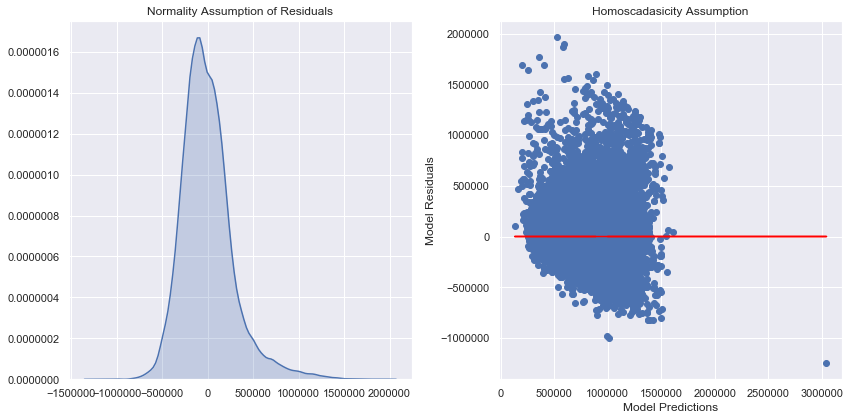

In [105]:
check_for_assumptions_with_kde(model6)

**Improved R squared but flipped our Beta value for baths from positive to negative, lets ignore this one then..**

I think I need to settle down with one of our previous models that is sound, I'll just centralize the predictors to reduce the multicollinearity between them. Picking model5 and standardizing the independent variables (centered about their mean)

## Model 7 ##
**'saleprice ~ sqft_ctr + baths_ctr + tot_basement_ctr + deck_ctr + porch_ctr'**

In [109]:
model5_df['sqft_ctr'] = model5_df['squarefeettotalliving'] - model5_df['squarefeettotalliving'].mean()
model5_df['baths_ctr'] = model5_df['baths'] - model5_df['baths'].mean()
model5_df['tot_basement_ctr'] = model5_df['squarefeettotalbasement'] - model5_df['squarefeettotalbasement'].mean()
model5_df['deck_ctr'] = model5_df['squarefeetdeck'] - model5_df['squarefeetdeck'].mean()
model5_df['porch_ctr'] = model5_df['sqftporch'] - model5_df['sqftporch'].mean()


In [112]:
model5_df.describe()

,saleprice,squarefeettotalliving,baths,squarefeettotalbasement,squarefeetdeck,sqftporch,sqft_ctr,baths_ctr,tot_basement_ctr,deck_ctr,porch_ctr
count,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,1.818200e+04,1.818200e+04,1.818200e+04,1.818200e+04
mean,7.334650e+05,2051.980420,2.156088,459.806677,130.436641,71.717028,-9.644185e-14,9.457229e-17,-2.801216e-15,-1.800782e-14,1.800782e-15
std,3.686947e+05,807.581704,0.732984,550.817241,203.032949,140.379654,8.075817e+02,7.329839e-01,5.508172e+02,2.030329e+02,1.403797e+02
min,5.000000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,-2.049980e+03,-2.156088e+00,-4.598067e+02,-1.304366e+02,-7.171703e+01
25%,4.690000e+05,1440.000000,1.750000,0.000000,0.000000,0.000000,-6.119804e+02,-4.060884e-01,-4.598067e+02,-1.304366e+02,-7.171703e+01
50%,6.500000e+05,1930.000000,2.250000,0.000000,0.000000,30.000000,-1.219804e+02,9.391156e-02,-4.598067e+02,-1.304366e+02,-4.171703e+01
75%,8.800000e+05,2550.000000,2.500000,930.000000,200.000000,100.000000,4.980196e+02,3.439116e-01,4.701933e+02,6.956336e+01,2.828297e+01
max,2.498000e+06,4490.000000,6.250000,3100.000000,2250.000000,11570.000000,2.438020e+03,4.093912e+00,2.640193e+03,2.119563e+03,1.149828e+04


In [114]:
model7_df = model5_df[['saleprice', 'sqft_ctr', 'baths_ctr', 'tot_basement_ctr', 'deck_ctr', 'porch_ctr']].copy()

formula = 'saleprice ~ sqft_ctr + baths_ctr + tot_basement_ctr + deck_ctr + porch_ctr'
model7 = ols(formula=formula, data=model7_df).fit()
#model5.summary()

Rsquared of Model: 0.37172471703159404
----------
Beta values of Model:
Intercept           733465.026400
sqft_ctr               233.429873
baths_ctr            23792.315803
tot_basement_ctr        54.175309
deck_ctr               130.434576
porch_ctr              154.006455
dtype: float64
Rainbow statistic: 1.092971235743509
Rainbow p-value: 1.134544627843599e-05


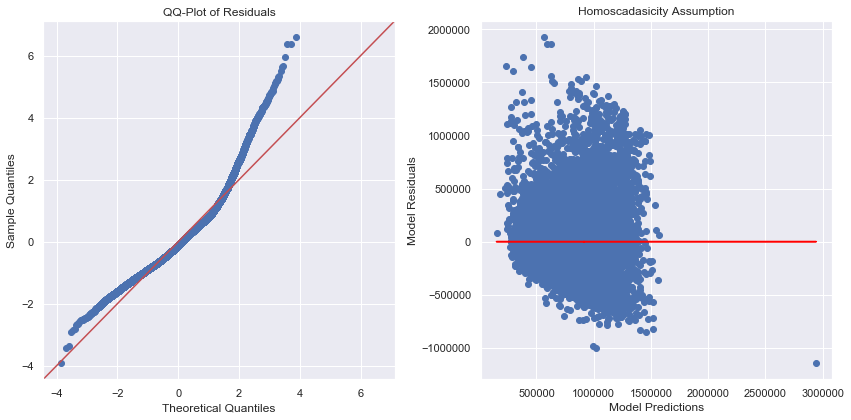

In [115]:
check_for_assumptions(model7)

Rsquared of Model: 0.37172471703159404
----------
Beta values of Model:
Intercept           733465.026400
sqft_ctr               233.429873
baths_ctr            23792.315803
tot_basement_ctr        54.175309
deck_ctr               130.434576
porch_ctr              154.006455
dtype: float64
Rainbow statistic: 1.092971235743509
Rainbow p-value: 1.134544627843599e-05


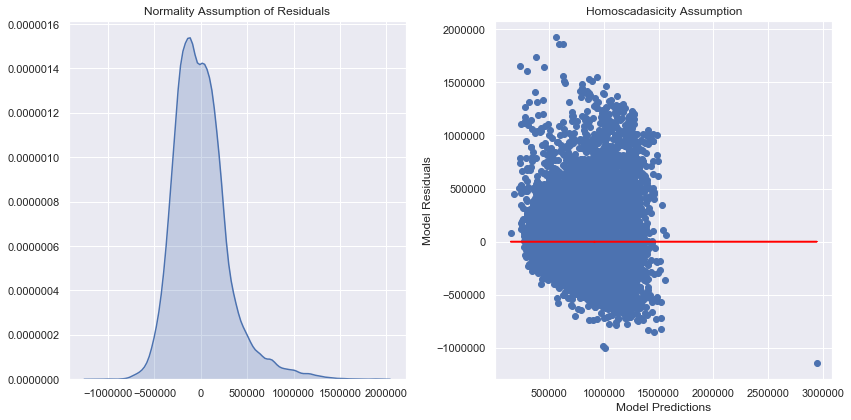

In [116]:
check_for_assumptions_with_kde(model7)

In [117]:
rows = model7_df.iloc[:, 1:].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(5)]
vif_df["feature"] = ['squarefeettotalliving', 'baths', 'squarefeettotalbasement', 'squarefeetdeck', 'sqftporch']

vif_df

,VIF,feature
0,2.479695,squarefeettotalliving
1,2.251030,baths
2,1.131081,squarefeettotalbasement
3,1.099358,squarefeetdeck
4,1.106671,sqftporch
